In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv(R"C:\Users\Shruti\ Python files\.ipynb_checkpoints\exchange_rate.csv", index_col=0, parse_dates=True)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


<Axes: xlabel='date'>

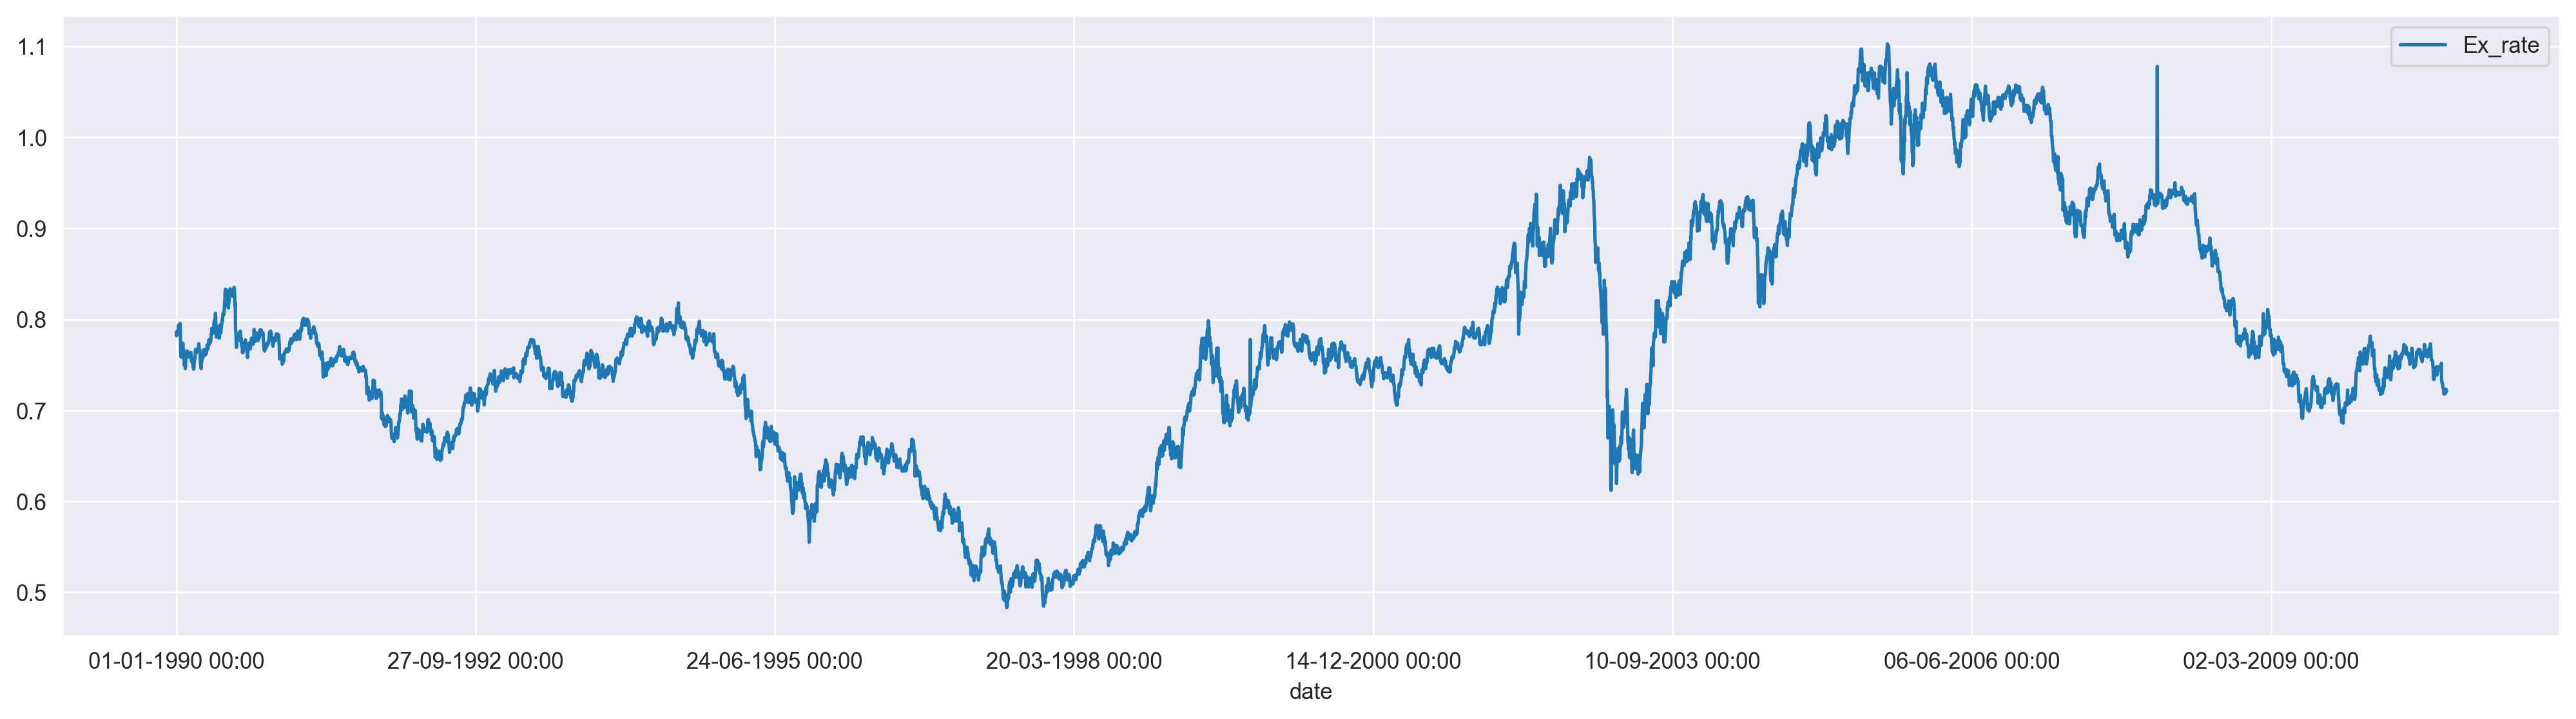

In [19]:
df.plot()

In [30]:
adfuller(df['Ex_rate'])[1]

0.44923273535979974

In [32]:
df.isna().sum()

Ex_rate    0
dtype: int64

In [34]:
df.duplicated().sum()

2258

In [36]:
order = auto_arima(df['Ex_rate'])

In [37]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [38]:
df.shape

(7588, 1)

In [39]:
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [40]:
train.shape

(7558, 1)

In [41]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662


In [48]:
test.shape

(30, 1)

# ARIMA Model

In [54]:
model = ARIMA(train['Ex_rate'], order=(1, 0, 5)).fit()

In [56]:
test

,Ex_rate
date,
11-09-2010 00:00,0.745796
12-09-2010 00:00,0.745045
13-09-2010 00:00,0.747692
14-09-2010 00:00,0.745601
15-09-2010 00:00,0.747680
16-09-2010 00:00,0.744602
17-09-2010 00:00,0.744158
18-09-2010 00:00,0.745184
19-09-2010 00:00,0.744990


In [60]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662


In [62]:
ypred = model.predict(start =1791, end = 1820)

In [66]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.03062672871681473
